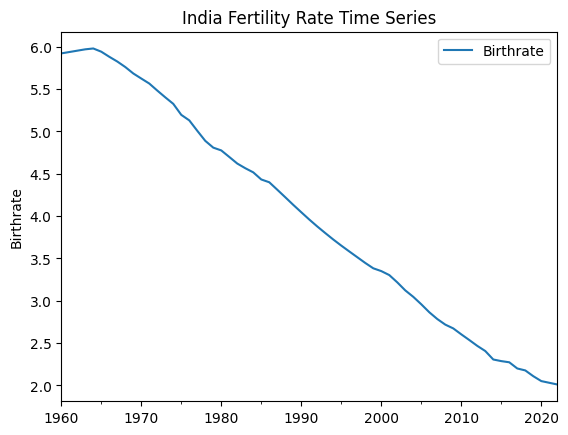

ADF Statistic: 0.4093494063501099
p-value: 0.9818412284434737
The time series is not stationary. Differencing may be required.


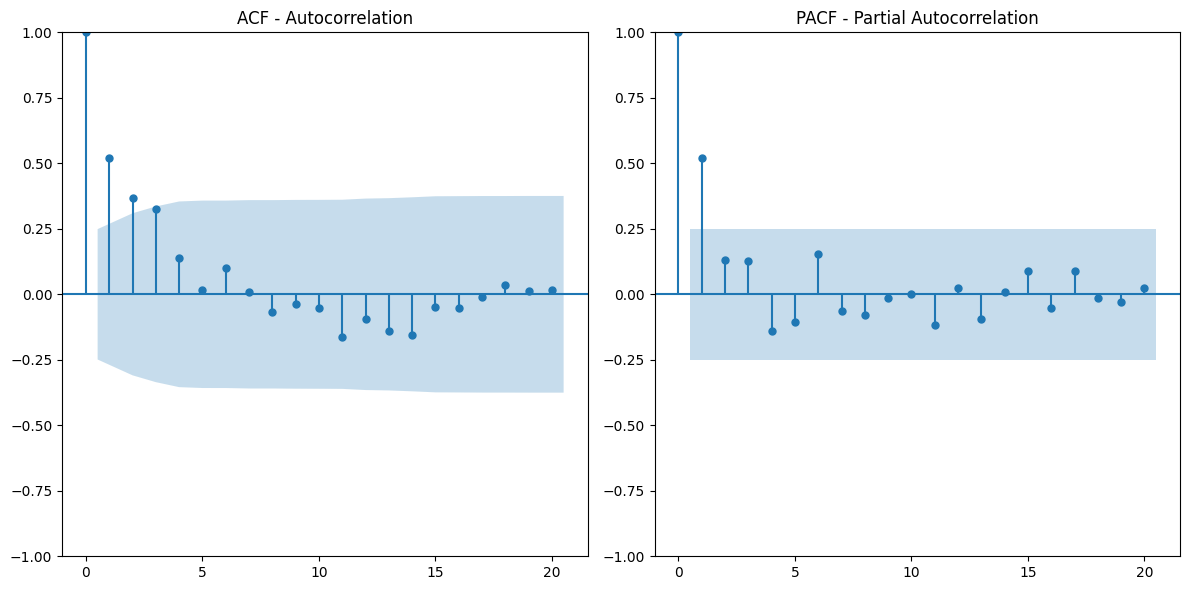

C:\Users\22150\mynewenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\22150\mynewenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\22150\mynewenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Birthrate   No. Observations:                   63
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 139.184
Date:                Wed, 23 Apr 2025   AIC                           -272.369
Time:                        19:50:48   BIC                           -265.987
Sample:                    01-01-1960   HQIC                          -269.863
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.017     58.048      0.000       0.956       1.023
ma.L1         -0.5274      0.105     -5.035      0.000      -0.733      -0.322
sigma2         0.0006      0.000      5.504      0.0

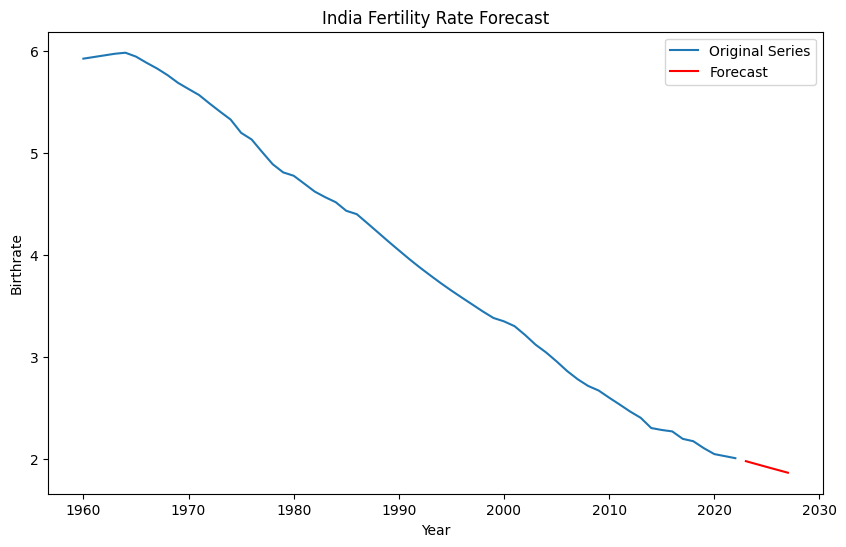

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Load data
file_path = r"C:\Users\22150\Downloads\Birthrate.csv"
df = pd.read_csv(file_path, skiprows=4)

# Filter for India
country = 'India'
country_df = df[df['Country Name'] == country]

# Extract year columns (columns that are digits)
year_columns = [col for col in country_df.columns if col.isdigit()]
ts = country_df[year_columns].T
ts.columns = ['Birthrate']

# Convert index to datetime
ts.index = pd.to_datetime(ts.index, format='%Y')

# Ensure the 'Birthrate' column is numeric
ts['Birthrate'] = pd.to_numeric(ts['Birthrate'], errors='coerce')

# Drop any rows with NaN values
ts = ts.dropna()

# Plot the time series
ts.plot()
plt.title(f"{country} Fertility Rate Time Series")
plt.ylabel('Birthrate')
plt.show()

# Check if the time series is stationary using the Augmented Dickey-Fuller test
result = adfuller(ts['Birthrate'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing may be required.")

# If the time series is not stationary, perform differencing (d = 1)
ts_diff = ts['Birthrate'].diff().dropna()

# Plot ACF and PACF to determine ARIMA parameters (p, d, q)
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(ts_diff, lags=20, ax=plt.gca())
plt.title("ACF - Autocorrelation")

plt.subplot(122)
plot_pacf(ts_diff, lags=20, ax=plt.gca())
plt.title("PACF - Partial Autocorrelation")

plt.tight_layout()
plt.show()

# Fit ARIMA model (For simplicity, we will use the parameters (p=1, d=1, q=1) as an example)
model = ARIMA(ts['Birthrate'], order=(1, 1, 1))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Forecast the next 5 years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the original series and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts['Birthrate'], label="Original Series")
forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=365), periods=forecast_steps, freq='YS')
plt.plot(forecast_index, forecast, label="Forecast", color='red')
plt.title(f"{country} Fertility Rate Forecast")
plt.xlabel('Year')
plt.ylabel('Birthrate')
plt.legend()
plt.show()
